#### Text-Cluster

In [1]:
#library to extract tweets
import tweepy

In [2]:
#Enter your key, token and secret obtained after creating Twitter app (apps.twitter.com)
consumer_key = 'xxxxxxxxxxxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

access_token = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

In [3]:
#OAuth authorization - pass consumer key, secret and set access token
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
#access 5000 tweets for '@AmericanAir'
max_tweets = 5000
searched_tweets = []
last_id = -1
while len(searched_tweets) < max_tweets:
    count = max_tweets - len(searched_tweets)
    try:
        #avoiding repeated tweets by filtering out retweets
        new_tweets = api.search(q='@AmericanAir -filter:retweets', count=count, max_id=str(last_id - 1))
        if not new_tweets:
            break
        searched_tweets.extend(new_tweets)
        last_id = new_tweets[-1].id
    except tweepy.TweepError as e:
        # depending on TweepError.code, one may want to retry or wait
        # to keep things simple, we will give up on an error
        break

In [5]:
#obtaining tweet text
americanairTweets = []
for tweet in searched_tweets:
    americanairTweets.append(tweet.text)

In [6]:
#creating a dataframe for @americanair for easy accessibility
import pandas as pd
americanairTweetsDf = pd.DataFrame({'Tweet Text':americanairTweets})
americanairTweetsDf

,Tweet Text
0,@TurtleShell83 @MarylandMick @AmericanAir They...
1,@jorge_guajardo @AmericanAir 😳😤😡
2,@el_reportero @jorge_guajardo @AmericanAir My ...
3,@AmericanAir - is anybody working here?
4,Escuchando @nacional @JuventudUy desde el aire...
5,"@AmericanAir Not great, Bob. https://t.co/7Qmb..."
6,Totally understand as a @AmericanAir advantag...
7,"5:24pm still haven't taken off yet, was suppos..."
8,"@AmericanAir Had a great flight, just landed. ..."
9,@phenrycissp @AmericanAir @Delta I swear they ...


In [7]:
#creating a corpus after pre-processing
import re
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
corpus = []
for i in range(0,len(americanairTweetsDf)):
    #removing numbers, punctuations and keeping only characters of the form a-z or A-Z
    tweet = re.sub('[^a-zA-Z]', ' ', americanairTweetsDf['Tweet Text'][i])
    #transforming every word to its lowercase
    tweet = tweet.lower()
    tweet = tweet.split()
    #Lemmatization
    lm = WordNetLemmatizer()
    #lemmatization and removing stop words
    tweet = [lm.lemmatize(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [8]:
#creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 45)
X = cv.fit_transform(corpus).toarray()

In [9]:
#creating a dataframe for Term document matrix 
tdm = pd.DataFrame(X, columns=cv.get_feature_names())
tdm.index = americanairTweetsDf['Tweet Text']
tdmTrans = tdm.T

In [10]:
#TDM for performing clustering of words
tdmTrans

Tweet Text,@TurtleShell83 @MarylandMick @AmericanAir They've done that to me before.,@jorge_guajardo @AmericanAir 😳😤😡,@el_reportero @jorge_guajardo @AmericanAir My vote goes to @AmericanAir,@AmericanAir - is anybody working here?,Escuchando @nacional @JuventudUy desde el aire en @AmericanAir 989 que salió atrasado por @futbolycia995 @DelSolUy esto compensa en algo,"@AmericanAir Not great, Bob. https://t.co/7Qmb8UsZxu",Totally understand as a @AmericanAir advantage member delays happen good communication would make it easier EWR AA staff isn't giving any,"5:24pm still haven't taken off yet, was supposed to depart at 5:09pm @americanair #StormandNaruto","@AmericanAir Had a great flight, just landed. Thanks for getting us home!",@phenrycissp @AmericanAir @Delta I swear they see you coming and have an evil plan to wreck your day every time.,...,@AmericanAir won't let me check in for my flight so now I'm worried I don't have a seat 🙃🙄,@AmericanAir sitting on the Clt tarmac for the last 30 minutes.,@AmericanAir SUCKS #americanairlinessucks,@AmericanAir cheat people of their time. Horrible airline. Should be shut down. #americanairlinessucks,@AmericanAir is without a doubt the worst airline in the world #americanairlinessucks,@ms4cy @AmericanAir I should have asked if @JeremyAbell1 wanted to drive me home! I probably could have beat my plane!,@AmericanAir is a failing airline because ignorant stupid people run it. #americanairlnessucks,@AmericanAir @SouthwestAir @TripIt And we wait... and wait.... and.... wait https://t.co/0G1x4yDGQg,"@ms4cy @AmericanAir 3 delays so far, 3 different gates so far. Hopefully I'll be home by the weekend at this rate!!",Another thing to love about T-Mobile #tmobilewingman on @AmericanAir 💁🏼
aa,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
airline,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
airport,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
american,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
americanair,1,1,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
amp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
back,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bag,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
check,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
co,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
#Normalizing the data
import numpy as np
from sklearn import preprocessing
tdmTrans_scaled_X = preprocessing.scale(tdmTrans.ix[:,:])
np.shape(tdmTrans_scaled_X)

(45, 5000)

In [13]:
#hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# generate the linkage matrix
Z_ward = linkage(tdmTrans_scaled_X, 'ward')

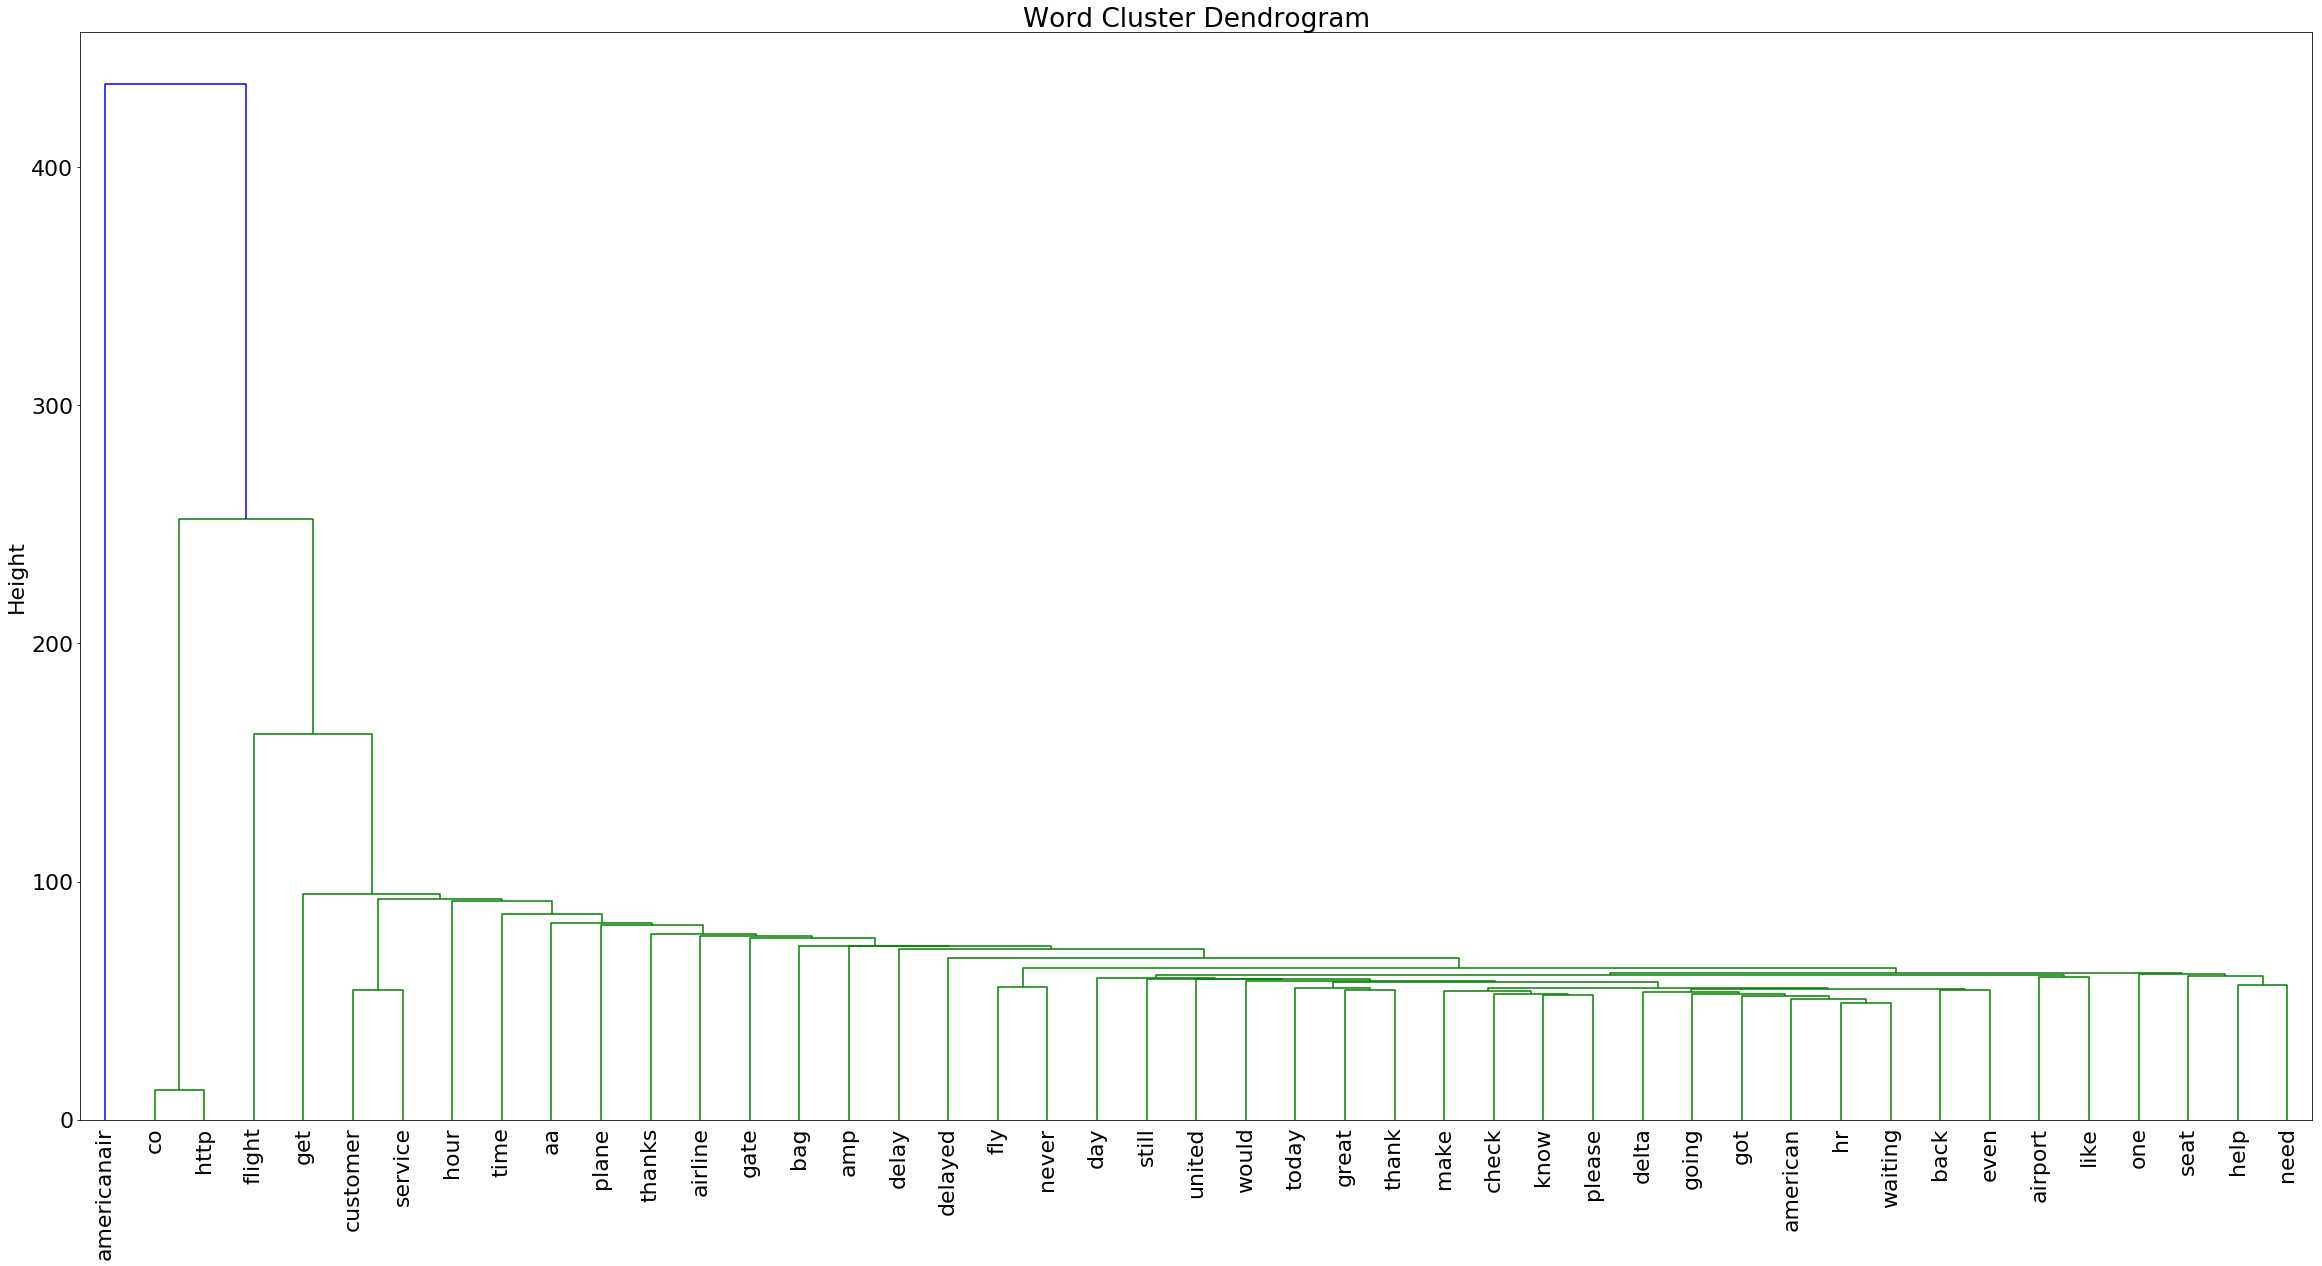

In [18]:
#plot dendograms
from scipy.cluster import hierarchy
import matplotlib
import matplotlib.pyplot as plt
# calculate full dendrogram
matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(40, 20))
plt.title('Word Cluster Dendrogram')
plt.ylabel('Height')
def llf(id):
        return tdmTrans.index.values[id]
dendrogram(
    Z_ward,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=22.,  # font size for the x axis labels
    leaf_label_func=llf
)
plt.show()

#### K-means

In [20]:
#creating X variable for performing k-means
X = tdmTrans.iloc[:,:].values

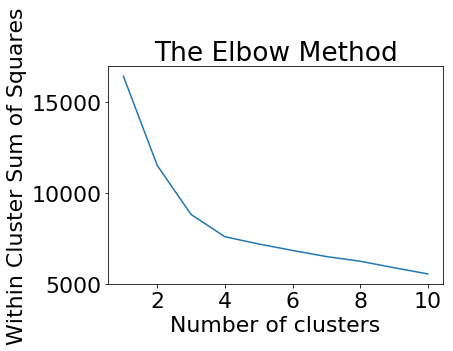

In [23]:
#using the elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=20, random_state=123457)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

#### From the plot above, optimal number of clusters is 4 (elbow is at 4)

In [24]:
#Applying k-means (at optimal k=4) to the tdm
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter=300, n_init = 20, random_state = 123457)
y_kmeans = kmeans.fit_predict(X)

In [28]:
y_kmeans

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
kmeans.cluster_centers_

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -6.93889390e-18,  -6.93889390e-18,  -1.38777878e-17, ...,
         -4.16333634e-17,   4.87804878e-02,  -6.93889390e-18],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   1.00000000e+00,   2.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00]])

In [30]:
#Sum of distances of samples to their closest cluster center.
kmeans.inertia_

7588.6463414634145